In [318]:
#imports 

import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
import datetime
#estimators 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics and models
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
#cross validation  


from sklearn.model_selection import train_test_split



In [2]:
# # datasets were merged by country index 

#EconomicIndex2019
#ds1 = pd.read_csv('data/economic.csv')    

#Covid-19  Summary until March 31st Infected vs Fatalities VS Ratio (Infected divided by fatalities)

#ds2 = pd.read_csv('data/trainv1.csv')

#ds3 = pd.read_csv('data/WHR20_DataForFigure2.1-Reduced5regions.csv')


In [3]:
#merge1 = pd.merge(ds1, ds3)
#merge1.to_csv(r'data/merges/merge1.csv')

In [4]:
#merge2 = pd.merge(ds2, merge1)

In [5]:
#merge2.to_csv(r'data/merge2.csv')

In [6]:
#Manually check the table to look for errors .  
#Moved datset to Data once it was merged and cleaned up a little bit 


In [2]:
source3 = pd.read_csv('data/merge3.csv')


In [3]:
source3.head()

,Country,Region,ConfirmedCases,Fatalities,Ratio Cases Vs fatalities,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,New Zealand,Asia-Pacific,647,1,647.000000,3.0,3.0,84.4,95.0,83.5,...,0.191598,0.221139,1.972317,1.242318,1.487218,1.008138,0.646790,0.325726,0.461268,2.128108
1,Iceland,Europe,1135,2,567.500000,11.0,4.0,77.1,87.4,63.8,...,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
2,Qatar,Middle East and North Africa,781,2,390.500000,28.0,3.0,72.6,64.5,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Uruguay,Americas,338,1,338.000000,40.0,6.0,68.6,68.3,58.9,...,-0.101103,0.635994,1.972317,1.071000,1.425081,0.856929,0.594267,0.132144,0.193425,2.167276
4,Singapore,Asia-Pacific,926,3,308.666667,2.0,2.0,89.4,97.4,92.4,...,0.029879,0.109784,1.972317,1.519580,1.395457,1.137814,0.635317,0.218771,0.533162,0.937032


In [4]:
source3.isna()

,Country,Region,ConfirmedCases,Fatalities,Ratio Cases Vs fatalities,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
162,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
163,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
164,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
chdataset=source3.fillna(0) # add 0 to every na or missing value =chdataset.fillna(0) # add 0 to every na or missing value 

In [6]:
chdataset=chdataset.replace(['Americas', 'Asia-Pacific', 'Europe', 'Middle East and North Africa', 'Sub-Saharan Africa'], 
                     [1, 2, 3, 4, 5]) 

In [38]:
chdataset.isna()

,Country,Region,ConfirmedCases,Fatalities,Ratio Cases Vs fatalities,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
162,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
163,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
164,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
#Converting all values to int64

In [7]:
dff2 =  chdataset

In [9]:
dff2[["Fatalities"]] = dff2[["Fatalities"]].apply(pd.to_numeric)

In [11]:
dff2[["Fatalities"]].dtypes

Fatalities    int64
dtype: object

In [12]:
dff2=dff2.drop(['GDP per Capita (PPP)'], axis=1)

In [21]:
dff2.iloc[:,2:53]=dff2.iloc[:,2:53].astype(np.int64)


In [22]:
dff2.dtypes

Country                                       object
Region                                         int64
ConfirmedCases                                 int64
Fatalities                                     int64
Ratio Cases Vs fatalities                      int64
World Rank                                     int64
Region Rank                                    int64
2019 Score                                     int64
Property Rights                                int64
Judical Effectiveness                          int64
Government Integrity                           int64
Tax Burden                                     int64
Gov't Spending                                 int64
Fiscal Health                                  int64
Business Freedom                               int64
Labor Freedom                                  int64
Monetary Freedom                               int64
Trade Freedom                                  int64
Investment Freedom                            

In [23]:
dff2.describe()

,Region,ConfirmedCases,Fatalities,Ratio Cases Vs fatalities,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,...,166.0,166.0,166.000000,166.000000,166.000000,166.000000,166.0,166.0,166.0,166.000000
mean,3.024096,5068.018072,252.108434,50.987952,83.771084,19.951807,59.283133,54.313253,46.500000,43.379518,...,0.0,0.0,0.837349,0.409639,0.650602,0.138554,0.0,0.0,0.0,1.319277
std,1.392411,20597.888125,1274.732509,91.279523,51.380771,12.931431,14.500510,20.710078,18.948975,21.487571,...,0.0,0.0,0.370163,0.493255,0.478222,0.346526,0.0,0.0,0.0,0.794215
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,2.000000,18.250000,0.000000,0.000000,43.250000,9.000000,55.000000,37.000000,32.250000,28.000000,...,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
50%,3.000000,189.000000,3.000000,21.000000,78.500000,19.000000,61.000000,52.500000,44.000000,37.000000,...,0.0,0.0,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,1.500000
75%,4.000000,1105.250000,19.250000,54.000000,125.750000,31.000000,67.000000,70.500000,61.000000,54.000000,...,0.0,0.0,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,2.000000
max,5.000000,188018.000000,12428.000000,647.000000,179.000000,47.000000,89.000000,97.000000,92.000000,96.000000,...,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,3.000000


In [41]:
dff2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 51 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country                                     166 non-null    object
 1   Region                                      166 non-null    int64 
 2   ConfirmedCases                              166 non-null    int64 
 3   Fatalities                                  166 non-null    int64 
 4   Ratio Cases Vs fatalities                   166 non-null    int64 
 5   World Rank                                  166 non-null    int64 
 6   Region Rank                                 166 non-null    int64 
 7   2019 Score                                  166 non-null    int64 
 8   Property Rights                             166 non-null    int64 
 9   Judical Effectiveness                       166 non-null    int64 
 10  Government Integrity      

In [24]:
df=dff2   #Backupdataset from here on 

In [42]:
# To work with countries only with fatalities, drop lines where fatalities are 0
df = df[df.Fatalities != 0]

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 0 to 121
Data columns (total 51 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country                                     115 non-null    object
 1   Region                                      115 non-null    int64 
 2   ConfirmedCases                              115 non-null    int64 
 3   Fatalities                                  115 non-null    int64 
 4   Ratio Cases Vs fatalities                   115 non-null    int64 
 5   World Rank                                  115 non-null    int64 
 6   Region Rank                                 115 non-null    int64 
 7   2019 Score                                  115 non-null    int64 
 8   Property Rights                             115 non-null    int64 
 9   Judical Effectiveness                       115 non-null    int64 
 10  Government Integrity      

In [44]:
df1 = df.iloc[:,2:53]

In [45]:
df1.describe()

,ConfirmedCases,Fatalities,Ratio Cases Vs fatalities,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,...,115.0,115.0,115.000000,115.000000,115.000000,115.000000,115.0,115.0,115.0,115.000000
mean,7290.356522,363.913043,73.600000,77.434783,18.730435,61.434783,57.565217,48.591304,45.965217,73.713043,...,0.0,0.0,0.930435,0.486957,0.765217,0.156522,0.0,0.0,0.0,1.460870
std,24451.158124,1520.147059,101.885023,50.556921,12.814001,13.294987,19.784422,19.033625,22.011532,16.477398,...,0.0,0.0,0.255526,0.502017,0.425718,0.364939,0.0,0.0,0.0,0.704459
min,4.000000,1.000000,3.000000,0.000000,0.000000,0.000000,7.000000,10.000000,7.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,138.000000,2.000000,18.500000,38.000000,7.500000,56.000000,41.000000,34.000000,29.500000,67.000000,...,0.0,0.0,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000
50%,645.000000,8.000000,38.000000,71.000000,16.000000,63.000000,57.000000,46.000000,39.000000,76.000000,...,0.0,0.0,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,2.000000
75%,2131.000000,43.500000,81.000000,112.500000,30.000000,68.000000,74.500000,62.500000,64.500000,84.000000,...,0.0,0.0,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,2.000000
max,188018.000000,12428.000000,647.000000,179.000000,45.000000,89.000000,97.000000,92.000000,96.000000,99.000000,...,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,3.000000


In [46]:
#Feature Scaling and data normalization 
normalizedfeatures=df1.apply(lambda x : (x-np.mean(x))/np.std(x))
normalizedfeatures.head()

,ConfirmedCases,Fatalities,Ratio Cases Vs fatalities,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,-0.272888,-0.239780,5.652542,-1.478740,-1.232970,1.704701,1.900415,1.815696,2.283065,-0.165373,...,NaN,NaN,0.273434,1.026436,0.553912,2.321398,NaN,NaN,NaN,0.768661
1,-0.252843,-0.239120,4.863907,-1.319810,-1.154589,1.175882,1.494287,0.760326,1.689881,-0.104418,...,NaN,NaN,0.273434,1.026436,0.553912,2.321398,NaN,NaN,NaN,0.768661
2,-0.267384,-0.239120,3.119052,-0.982084,-1.232970,0.798155,0.326668,0.602020,1.416103,1.541361,...,NaN,NaN,-3.657185,-0.974245,-1.805342,-0.430775,NaN,NaN,NaN,-2.082822
3,-0.285581,-0.239780,2.606439,-0.743689,-0.997826,0.495973,0.529732,0.496483,1.051067,0.200356,...,NaN,NaN,0.273434,1.026436,0.553912,-0.430775,NaN,NaN,NaN,0.768661
4,-0.261428,-0.238459,2.310701,-1.498606,-1.311351,2.082428,2.001947,2.290613,2.237435,0.992768,...,NaN,NaN,0.273434,1.026436,0.553912,2.321398,NaN,NaN,NaN,-2.082822


In [47]:
correlation1 = df1.corr() # withselected fettures

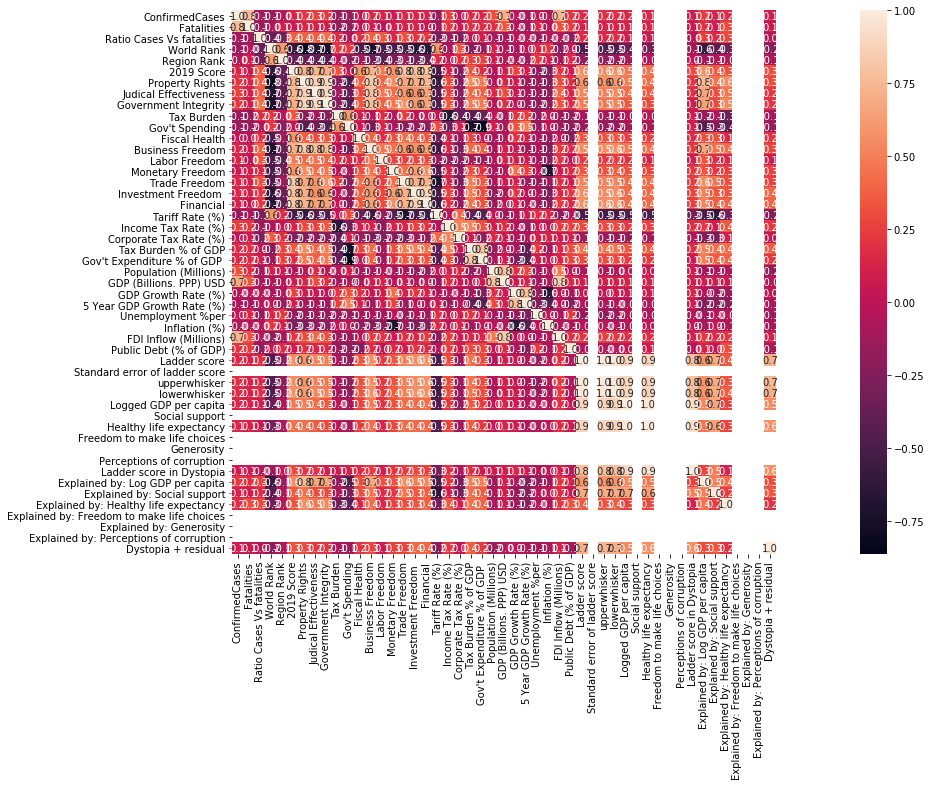

In [48]:
plt.subplots(figsize=(30,10))
sns.heatmap( correlation1, square=True, annot=True, fmt=".1f" )


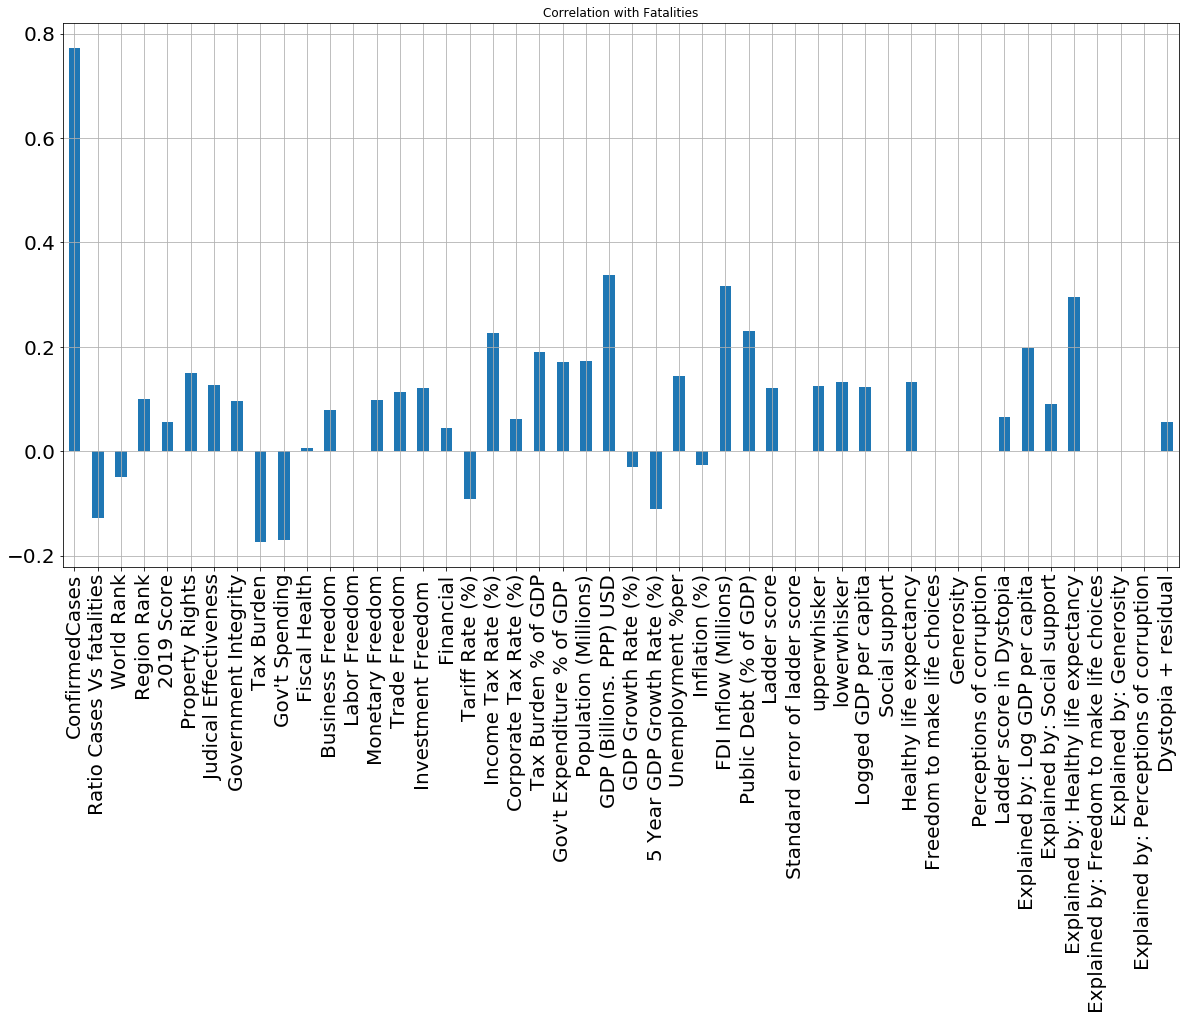

In [49]:
X = df1.drop(['Fatalities'],axis=1)
X.corrwith(df1['Fatalities']).plot.bar(figsize = (20, 10), title = "Correlation with Fatalities", 
                                        fontsize = 20,rot = 90, grid = True)

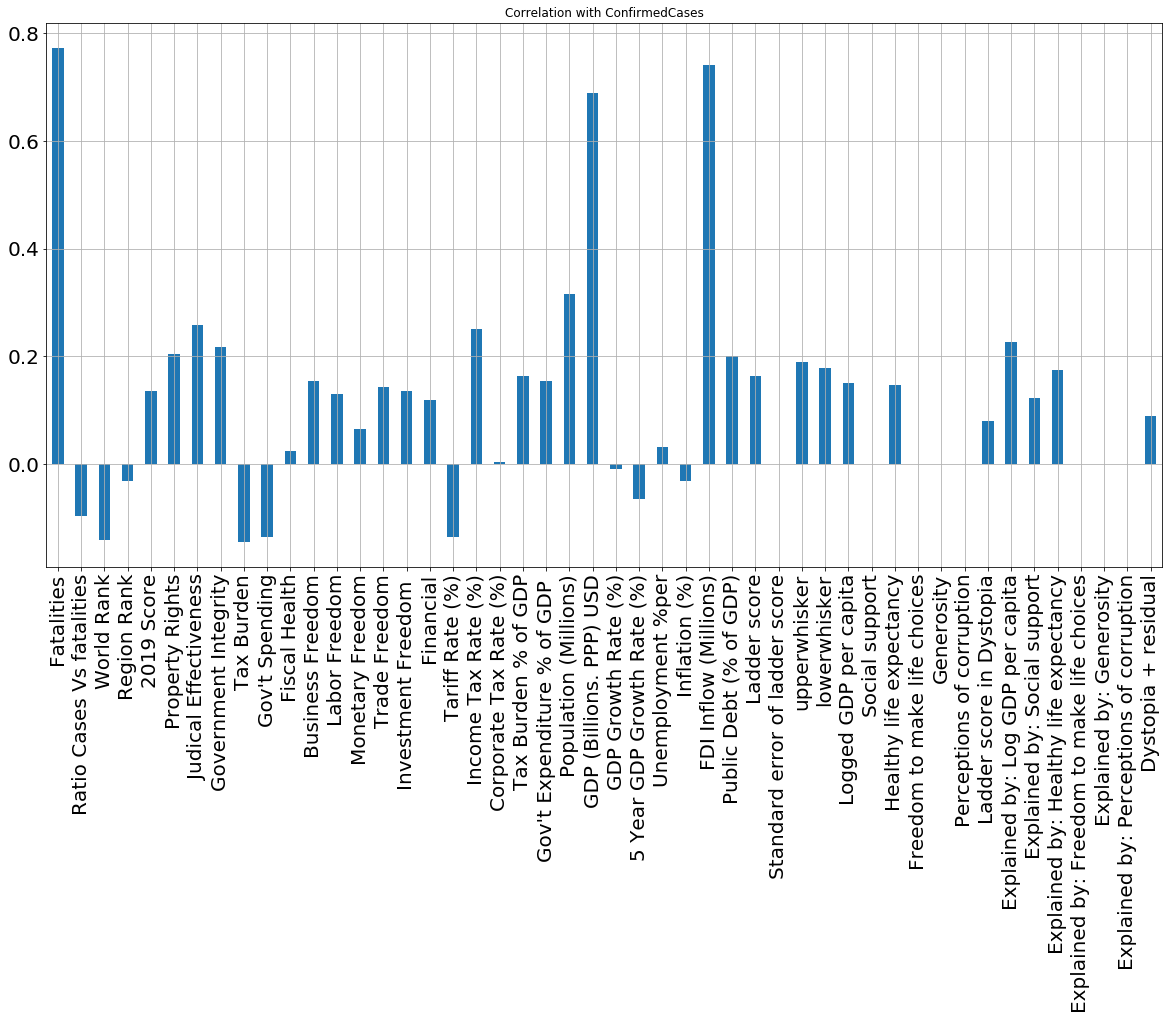

In [50]:
X = df1.drop(['ConfirmedCases'],axis=1)
X.corrwith(df1['ConfirmedCases']).plot.bar(figsize = (20, 10), title = "Correlation with ConfirmedCases", 
                                        fontsize = 20,rot = 90, grid = True)

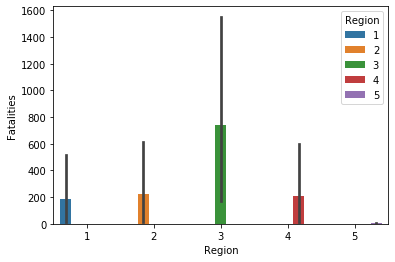

In [51]:
sns.barplot(x='Region',y='Fatalities',data=df
            ,hue='Region')


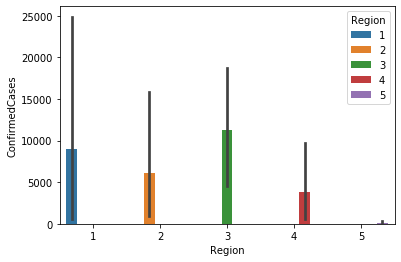

In [55]:
sns.barplot(x='Region',y='ConfirmedCases',data=df
            ,hue='Region')

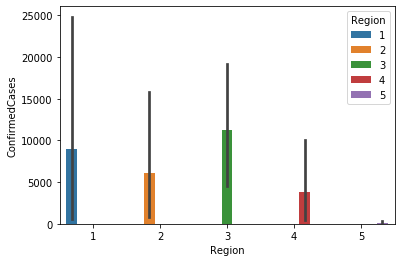

In [57]:
sns.barplot(x='Region',y='ConfirmedCases',data=df
            ,hue='Region')

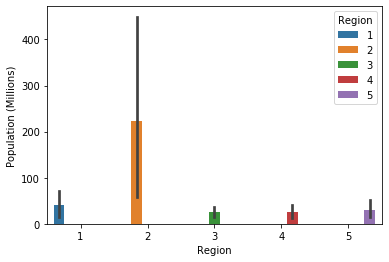

In [58]:
sns.barplot(x='Region',y='Population (Millions)',data=df
            ,hue='Region')

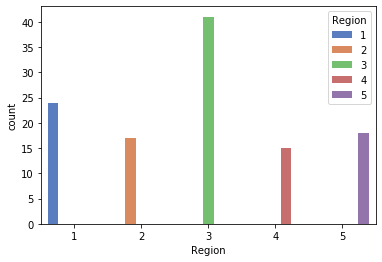

In [60]:
sns.countplot(x="Region", data=df,hue="Region", palette="muted")

In [ ]:
#Change name of colum to be able to do feature selection on that colum since it has a apostrop. 

In [138]:
pos = [22]
colname = df1.columns[pos]
print (colname)

Index(['Expenditure % of GDP '], dtype='object')


In [139]:
df1 = df1.rename(columns={"Gov't Expenditure % of GDP ":"Expenditure % of GDP"})

In [140]:
#Check again 
pos = [22]
colname = df1.columns[pos]
print (colname)

Index(['Expenditure % of GDP '], dtype='object')


In [637]:
df1 = df1.rename(columns={"Gov't Spending":"Spending"})

In [638]:
df1.head()

,ConfirmedCases,Fatalities,Ratio Cases Vs fatalities,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,647,1,647,3,3,84,95,83,96,71,...,0,0,1,1,1,1,0,0,0,2
1,1135,2,567,11,4,77,87,63,83,72,...,0,0,1,1,1,1,0,0,0,2
2,781,2,390,28,3,72,64,60,77,99,...,0,0,0,0,0,0,0,0,0,0
3,338,1,338,40,6,68,68,58,69,77,...,0,0,1,1,1,0,0,0,0,2
4,926,3,308,2,2,89,97,92,95,90,...,0,0,1,1,1,1,0,0,0,0


In [142]:
# removing rows with more than 42 % of 0 values in them 


In [143]:
#df1 converts into a dffinal2 as bk point

In [639]:
dffinal2 = df1


In [145]:
 #Eliminate all the ROWS that have more than 30% of zero values in the zeros, 
#this needs to be done because since 3 datasets are being in use, some of the entries in the world happiness
#record  are not present in the world economic index and viceversa . Also some of the countries with covid-19 reported 
#cases do not have information in at least 1 of the datasets

#More than 90 countries have all the information complete

In [640]:
dffinal2 = dffinal2[(dffinal2==0).sum(axis=1)/len(dffinal2.columns) <= 0.30]

In [645]:
#Check again 
pos = [10]
colname = df1.columns[pos]
print (colname)

Index(['Spending'], dtype='object')


In [646]:
dffinal2   #reduced to 106 rows, less 0s more acurrate the results  but less data

,ConfirmedCases,Fatalities,Ratio Cases Vs fatalities,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,647,1,647,3,3,84,95,83,96,71,...,0,0,1,1,1,1,0,0,0,2
1,1135,2,567,11,4,77,87,63,83,72,...,0,0,1,1,1,1,0,0,0,2
3,338,1,338,40,6,68,68,58,69,77,...,0,0,1,1,1,0,0,0,0,2
4,926,3,308,2,2,89,97,92,95,90,...,0,0,1,1,1,1,0,0,0,0
5,1353,5,270,102,11,58,58,39,39,62,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,105792,12428,8,80,36,62,71,49,43,55,...,0,0,1,1,1,1,0,0,0,2
113,8,1,8,175,45,40,29,24,15,62,...,0,0,1,0,1,0,0,0,0,0
116,6,1,6,119,18,55,27,30,30,78,...,0,0,1,0,1,0,0,0,0,1
117,5,1,5,107,21,57,33,18,20,76,...,0,0,1,0,1,0,0,0,0,2


In [647]:

#Fatalities the dependant variable is on the second row ddfinal3 is set to remove that colum
dffinal3 = dffinal2.drop(columns=['Fatalities'])

In [652]:
#Remove all the negative correlated variables for featurec
dffinal4 = dffinal3.drop(columns=['Ratio Cases Vs fatalities','World Rank','Region Rank','Tax Burden','Spending','Labor Freedom','Tariff Rate (%)','GDP Growth Rate (%)','5 Year GDP Growth Rate (%)','Inflation (%)','Standard error of ladder score','Social support','Freedom to make life choices','Generosity','Perceptions of corruption','Explained by: Freedom to make life choices','Explained by: Generosity','Explained by: Perceptions of corruption'])

In [653]:
dffinal4

,ConfirmedCases,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Fiscal Health,Business Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,...,Ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Healthy life expectancy,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Dystopia + residual
0,647,84,95,83,96,98,91,87,92,80,...,7,7,7,10,73,1,1,1,1,2
1,1135,77,87,63,83,96,88,81,87,85,...,7,7,7,10,73,1,1,1,1,2
3,338,68,68,58,69,69,74,72,78,85,...,6,6,6,9,69,1,1,1,0,2
4,926,89,97,92,95,80,90,85,94,85,...,6,6,6,11,76,1,1,1,1,0
5,1353,58,58,39,39,62,64,75,76,45,...,4,4,4,9,56,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,105792,62,71,49,43,71,71,84,86,85,...,6,6,6,10,73,1,1,1,1,2
113,8,40,29,24,15,23,33,72,70,25,...,3,3,3,7,55,1,0,1,0,0
116,6,55,27,30,30,80,61,81,62,50,...,4,4,4,8,57,1,0,1,0,1
117,5,57,33,18,20,93,56,72,76,60,...,6,6,6,8,67,1,0,1,0,2


In [655]:
#FEATURE SELECTION
# 3 differents sets of features are being created in order to tune and increase accuracy with the models
features = dffinal2[['ConfirmedCases','Property Rights', 'Judical Effectiveness','Trade Freedom', 'Investment Freedom ','Income Tax Rate (%)','Tax Burden % of GDP','Expenditure % of GDP ','GDP (Billions. PPP) USD','FDI Inflow (Millions)','Public Debt (% of GDP)','Ladder score']]
features2 = dffinal2[['ConfirmedCases','Income Tax Rate (%)','GDP (Billions. PPP) USD','FDI Inflow (Millions)','Public Debt (% of GDP)','Healthy life expectancy']]
features3 = dffinal2[['ConfirmedCases','Income Tax Rate (%)','GDP (Billions. PPP) USD','FDI Inflow (Millions)','Public Debt (% of GDP)','Explained by: Healthy life expectancy']]
featuresa = dffinal3.iloc[:,0:49]
featuresb = dffinal4.iloc[:,0:30]

print('Summary of feature selection 1')
features.head()
features2.head()
features3.head()
featuresb.head()

Summary of feature selection 1


,ConfirmedCases,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Fiscal Health,Business Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,...,Ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Healthy life expectancy,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Dystopia + residual
0,647,84,95,83,96,98,91,87,92,80,...,7,7,7,10,73,1,1,1,1,2
1,1135,77,87,63,83,96,88,81,87,85,...,7,7,7,10,73,1,1,1,1,2
3,338,68,68,58,69,69,74,72,78,85,...,6,6,6,9,69,1,1,1,0,2
4,926,89,97,92,95,80,90,85,94,85,...,6,6,6,11,76,1,1,1,1,0
5,1353,58,58,39,39,62,64,75,76,45,...,4,4,4,9,56,1,0,1,0,1


In [592]:
#dependent variable definition
depVar = dffinal2['Fatalities']
depVar.tail()

112    12428
113        1
116        1
117        1
119        1
Name: Fatalities, dtype: int64

In [593]:
#Feature Scaling and data normalization 
normalizedfeatures3=features3.apply(lambda x : (x-np.mean(x))/np.std(x))
normalizedfeatures2=features2.apply(lambda x : (x-np.mean(x))/np.std(x))
normalizedfeatures=features.apply(lambda x : (x-np.mean(x))/np.std(x))
normalizedfeaturesa=featuresa.apply(lambda x : (x-np.mean(x))/np.std(x))              ##<---Using features "a"
normalizedfeaturesb=featuresb.apply(lambda x : (x-np.mean(x))/np.std(x))              ##<---Using features "a"

normalizedfeaturesb.head()

,ConfirmedCases,Ratio Cases Vs fatalities,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,...,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita
0,-0.286731,5.787726,-1.508321,-1.279361,2.085901,1.835848,1.787792,2.234270,-0.287200,-0.449989,...,1.404726,1.540865,0.808657,NaN,1.107867,NaN,NaN,NaN,NaN,0.944911
1,-0.267417,4.980053,-1.344023,-1.199307,1.387148,1.428735,0.706754,1.644344,-0.210129,-0.700596,...,1.404726,1.540865,0.808657,NaN,1.107867,NaN,NaN,NaN,NaN,0.944911
3,-0.298961,2.668086,-0.748445,-1.039198,0.488751,0.461842,0.436495,1.009039,0.175229,0.260064,...,0.502296,0.648342,-0.154463,NaN,0.439680,NaN,NaN,NaN,NaN,0.944911
4,-0.275689,2.365208,-1.528858,-1.359416,2.585011,1.937626,2.274259,2.188892,1.177158,1.220724,...,0.502296,0.648342,1.771776,NaN,1.609008,NaN,NaN,NaN,NaN,0.944911
5,-0.258788,1.981563,0.524861,-0.638925,-0.509468,-0.047048,-0.590491,-0.352329,-0.980844,0.260064,...,-1.302564,-1.136704,-0.154463,NaN,-1.731929,NaN,NaN,NaN,NaN,-1.058301


In [657]:
#Spiliting Dataset into training(70%) and test set(30%) with normalized pre selected features
#the X factor indicator number represents the set of features being used to experiment with the different models 
X  = features
X3 = features3
X2 = features2   #
Xa = featuresa   #0.45
Xb = featuresb
X = features
y = depVar





In [658]:
#revise types again XA

In [659]:
# Data Divided in 2  Train and test according to feature selection 

In [660]:
#To make models based on features1
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30) #-<---Change X#s on this line
X_train.shape

(74, 12)

In [661]:
X_test.shape


(32, 12)

In [662]:
#To make models based on features2
from sklearn.model_selection import train_test_split
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y,test_size = 0.30) #-<---Change X#s on this line
X2_train.shape

(74, 6)

In [663]:
X2_test.shape


(32, 6)

In [664]:
#To make models based on features3
from sklearn.model_selection import train_test_split
X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y,test_size = 0.30) #-<---Change X#s on this line
X3_train.shape

(74, 6)

In [665]:
X3_test.shape


(32, 6)

In [666]:
#To make models based on featuresa
from sklearn.model_selection import train_test_split
Xa_train,Xa_test,ya_train,ya_test = train_test_split(Xa,y,test_size = 0.30) #-<---Change X#s on this line
Xa_train.shape

(74, 48)

In [667]:
Xa_test.shape


(32, 48)

In [668]:
#To make models based on featuresb
from sklearn.model_selection import train_test_split
Xb_train,Xb_test,yb_train,yb_test = train_test_split(Xb,y,test_size = 0.30) #-<---Change X#s on this line
Xb_train.shape

(74, 30)

In [669]:
Xb_test.shape


(32, 30)

In [670]:
###############################Begining of Models


In [671]:
#######################Other technique             ##-<---Change X#s on this line

In [672]:
#Feature suggestion and selector , with this tool     with this the re is a need to go back a reselect features to change X#s

In [673]:
#

In [674]:
#
#import matplotlib.pyplot as plt
#from sklearn.svm import SVC
#from sklearn.model_selection import StratifiedKFold
#from sklearn.feature_selection import RFECV
#from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
#X, y = make_classification(n_samples=106, n_features=52, n_informative=48,
                     #      n_redundant=0, n_repeated=0, n_classes=100,
                    #       n_clusters_per_class=1, random_state=1)
#
# Create the RFE object and compute a cross-validated score.
#svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
#rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
             # scoring='accuracy')
#rfecv.fit(X, y)

#print("Optimal number of features : %d" % rfecv.n_features_)

print ('Best parameters: %s' % random_search.best_params_)

In [675]:
##################################


#################################

#################################


In [676]:
# Spot Check Algorithms

# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


############################################## Model with XA + YA
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=8, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, Xa_train, ya_train, cv=kfold, scoring='accuracy')  ##-<---Change X#s on this line
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has o

LR: 0.147222 (0.088323)
LDA: 0.054167 (0.077666)
KNN: 0.175000 (0.070874)
CART: 0.079167 (0.067914)
NB: 0.080556 (0.072595)
SVM: 0.161111 (0.050614)


/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)


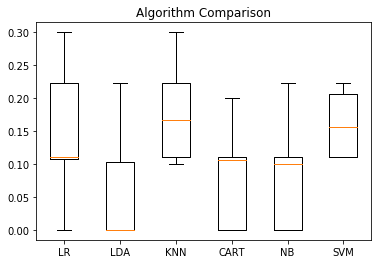

In [677]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [678]:
############################################## Model with X + Y
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=8, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')  ##-<---Change X#s on this line
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LR: 0.122222 (0.083887)
LDA: 0.093056 (0.108857)
KNN: 0.119444 (0.080842)
CART: 0.122222 (0.067358)
NB: 0.094444 (0.099846)


/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.

SVM: 0.147222 (0.047059)


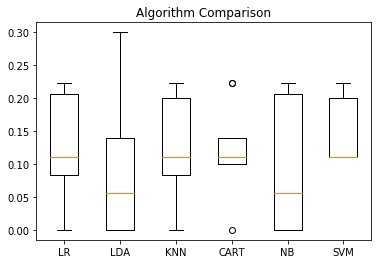

In [679]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [693]:
############################################## Model with X2 + Y2
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=9, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X2_train, y2_train, cv=kfold, scoring='accuracy')  ##-<---Change X#s on this line
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)


LR: 0.106481 (0.087597)
LDA: 0.118827 (0.094904)
KNN: 0.174383 (0.081279)
CART: 0.121914 (0.098596)
NB: 0.095679 (0.078142)
SVM: 0.174383 (0.055983)


/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)


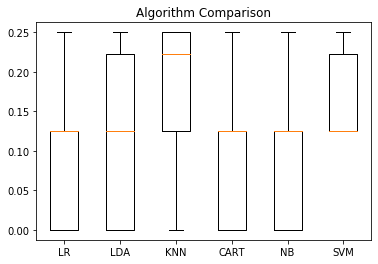

In [681]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [691]:
############################################## Model with X3 + Y3
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=9, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X3_train, y3_train, cv=kfold, scoring='accuracy')  ##-<---Change X#s on this line
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)


LR: 0.108025 (0.070449)
LDA: 0.081790 (0.082673)
KNN: 0.108025 (0.070449)
CART: 0.069444 (0.103935)
NB: 0.055556 (0.062113)
SVM: 0.121914 (0.005774)


/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)


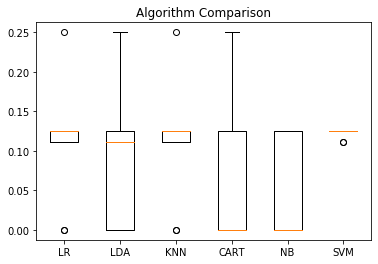

In [692]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [684]:
############################################## Model with Xb + Yb

In [687]:
############################################## Model with X3 + Y3
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, Xb_train, yb_train, cv=kfold, scoring='accuracy')  ##-<---Change X#s on this line
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase th

LR: 0.105357 (0.095314)
LDA: 0.026786 (0.053720)
KNN: 0.182143 (0.140335)
CART: 0.051786 (0.063613)
NB: 0.083929 (0.068721)
SVM: 0.160714 (0.045175)


/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/home/laab/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


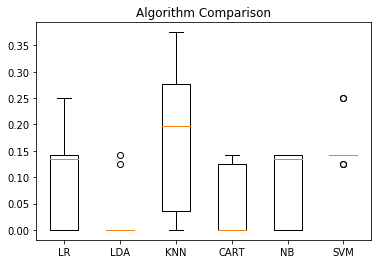

In [689]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [ ]:
##############################Predictions
